In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src1 = cv2.imread("angelina.png");
src1_fft = np.fft.fft2(src1)
src2 = cv2.imread("kate.png");
add = cv2.add(src1, src2);
cv2.imshow('image', add)

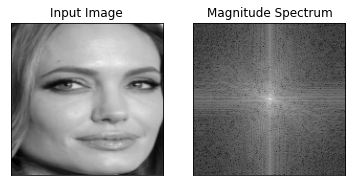

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

angelina_img = cv2.imread('angelina.png',0)

"""
numpy.fft.fft2(a, s=None, axes=(-2, -1), norm=None)[source]
Compute the 2-dimensional discrete Fourier Transform
"""
angelina_f = np.fft.fft2(angelina_img)
"""Shift the zero-frequency component to the center of the spectrum"""
fshift = np.fft.fftshift(angelina_f)
angelina_magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(angelina_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(angelina_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


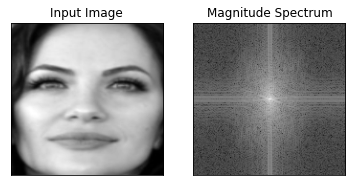

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

kate_img = cv2.imread('kate.png',0)
kate_f = np.fft.fft2(kate_img)
fshift = np.fft.fftshift(kate_f)
kate_magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(kate_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(kate_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

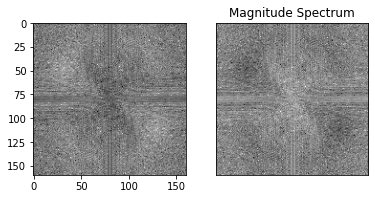

In [4]:
subtracted = kate_magnitude_spectrum - angelina_magnitude_spectrum
inversesub = angelina_magnitude_spectrum - kate_magnitude_spectrum


plt.subplot(122),plt.imshow(subtracted, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(inversesub, cmap = 'gray')
plt.show()


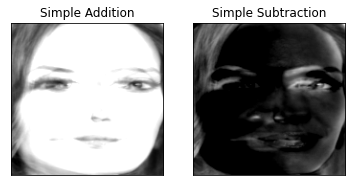

In [5]:
fshift = np.fft.ifftshift(subtracted)
subtracted_reconstructed = np.fft.ifft2(fshift)

plt.subplot(121),plt.imshow(cv2.add(angelina_img,kate_img), cmap = 'gray')
plt.title('Simple Addition'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.subtract(angelina_img,kate_img), cmap = 'gray')
plt.title('Simple Subtraction'), plt.xticks([]), plt.yticks([])

plt.show()

Size Cell: (160, 160)
Size Back: (160, 160)


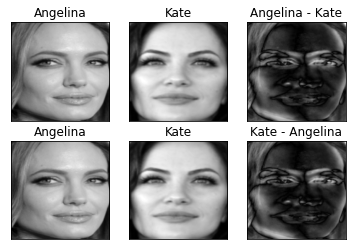

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


#### FFT SUBSTRACT
#Extract image
CellImg = cv2.imread('angelina.png',0)
BackImg = cv2.imread('kate.png',0)

#Covnert to 32 float
CellImg_float32 = np.float32(CellImg)
BackImg_float32 = np.float32(BackImg)

print("Size Cell: "+str(np.shape(CellImg_float32)))
print("Size Back: "+str(np.shape(BackImg_float32)))

# DFT
dft_CellImg_float32 = cv2.dft(CellImg_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_CellImg_float32 = np.fft.fftshift(dft_CellImg_float32)

dft_BackImg_float32 = cv2.dft(BackImg_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_BackImg_float32 = np.fft.fftshift(dft_BackImg_float32)

# Subtract and inverse: CELL - BACKGROUND
dft_diff_cmb = dft_shift_CellImg_float32 - dft_shift_BackImg_float32
SubFFTImg_inverse_cmb = cv2.idft(np.fft.ifftshift(dft_diff_cmb))
SubFFTImg_cmb = cv2.magnitude(SubFFTImg_inverse_cmb[:,:,0],SubFFTImg_inverse_cmb[:,:,1])

# Subtract and inverse: BACKGROUND - CELL
dft_diff_bmc = dft_shift_BackImg_float32 - dft_shift_CellImg_float32
SubFFTImg_inverse_bmc = cv2.idft(np.fft.ifftshift(dft_diff_bmc))
SubFFTImg_bmc = cv2.magnitude(SubFFTImg_inverse_bmc[:,:,0],SubFFTImg_inverse_bmc[:,:,1])

# Plot Init image -> (Image - Background) & (Background - Image)
plt.figure()
plt.subplot(231),plt.imshow(CellImg, cmap = 'gray')
plt.title('Angelina'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(BackImg, cmap = 'gray')
plt.title('Kate'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(SubFFTImg_cmb, cmap = 'gray')
plt.title('Angelina - Kate'), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(CellImg, cmap = 'gray')
plt.title('Angelina'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(BackImg, cmap = 'gray')
plt.title('Kate'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(SubFFTImg_bmc, cmap = 'gray')
plt.title('Kate - Angelina'), plt.xticks([]), plt.yticks([])

plt.show() 

Size Cell: (160, 160)
Size Back: (160, 160)


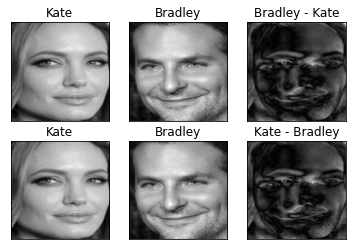

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


#### FFT SUBSTRACT
#Extract image
CellImg = cv2.imread('angelina.png',0)
BackImg = cv2.imread('bradley.png',0)

#Covnert to 32 float
CellImg_float32 = np.float32(CellImg)
BackImg_float32 = np.float32(BackImg)

print("Size Cell: "+str(np.shape(CellImg_float32)))
print("Size Back: "+str(np.shape(BackImg_float32)))

# DFT
dft_CellImg_float32 = cv2.dft(CellImg_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_CellImg_float32 = np.fft.fftshift(dft_CellImg_float32)

dft_BackImg_float32 = cv2.dft(BackImg_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_BackImg_float32 = np.fft.fftshift(dft_BackImg_float32)

# Subtract and inverse: CELL - BACKGROUND
dft_diff_cmb = dft_shift_CellImg_float32 - dft_shift_BackImg_float32
SubFFTImg_inverse_cmb = cv2.idft(np.fft.ifftshift(dft_diff_cmb))
SubFFTImg_cmb = cv2.magnitude(SubFFTImg_inverse_cmb[:,:,0],SubFFTImg_inverse_cmb[:,:,1])

# Subtract and inverse: BACKGROUND - CELL
dft_diff_bmc = dft_shift_BackImg_float32 - dft_shift_CellImg_float32
SubFFTImg_inverse_bmc = cv2.idft(np.fft.ifftshift(dft_diff_bmc))
SubFFTImg_bmc = cv2.magnitude(SubFFTImg_inverse_bmc[:,:,0],SubFFTImg_inverse_bmc[:,:,1])

# Plot Init image -> (Image - Background) & (Background - Image)
plt.figure()
plt.subplot(231),plt.imshow(CellImg, cmap = 'gray')
plt.title('Kate'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(BackImg, cmap = 'gray')
plt.title('Bradley'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(SubFFTImg_cmb, cmap = 'gray')
plt.title('Bradley - Kate'), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(CellImg, cmap = 'gray')
plt.title('Kate'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(BackImg, cmap = 'gray')
plt.title('Bradley'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(SubFFTImg_bmc, cmap = 'gray')
plt.title('Kate - Bradley'), plt.xticks([]), plt.yticks([])

plt.show() 